In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

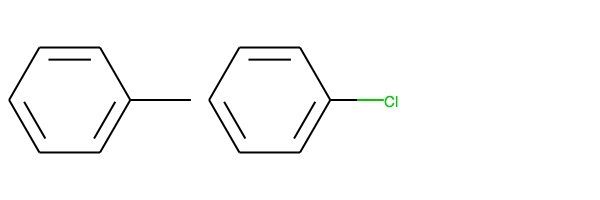

In [3]:
Draw.MolsToGridImage([mol1, mol2])

In [4]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [5]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

In [6]:
apx = Chem.MolFromSmiles("COc1ccc(cc1)n2nc(C(=O)N)c3CCN(C(=O)c23)c4ccc(cc4)N5CCCCC5=O")
rvx = Chem.MolFromSmiles("Clc1ccc(s1)C(=O)NC[C@H]2CN(C(=O)O2)c3ccc(cc3)N4CCOCC4=O")

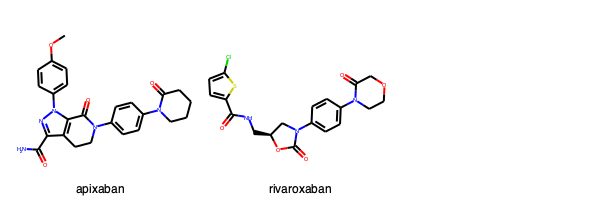

In [7]:
Draw.MolsToGridImage([apx, rvx], legends=["apixaban", "rivaroxaban"])

In [27]:
apx_fp = AllChem.GetMorganFingerprint(apx, 2)
rvx_fp = AllChem.GetMorganFingerprint(rvx, 2)

In [28]:
DataStructs.TanimotoSimilarity(apx_fp, rvx_fp)

0.40625